In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [27]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
data=np.array(data)
m, n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]/255

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]/255

In [76]:
def init_params():
    W1=np.random.randn(10,784)*0.01
    b1=np.random.randn(10,1)
    W2=np.random.randn(10,10)*0.01
    b2=np.random.randn(10,1)
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)



def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return (Z > 0).astype(float)
    
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m=Y.size
    one_hot_Y=one_hot(Y)
    dZ2=A2-one_hot_Y
    dW2=(1/m)*dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1=W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1=(1/m)*dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2

Forward propagation

Z[1]=W[1]X+b[1]
 
A[1]=gReLU(Z[1]))
 
Z[2]=W[2]A[1]+b[2]
 
A[2]=gsoftmax(Z[2])
 
Backward propagation

dZ[2]=A[2]−Y
 
dW[2]=1mdZ[2]A[1]T
 
dB[2]=1mΣdZ[2]
 
dZ[1]=W[2]TdZ[2].∗g[1]′(z[1])
 
dW[1]=1mdZ[1]A[0]T
 
dB[1]=1mΣdZ[1]
 
Parameter updates

W[2]:=W[2]−αdW[2]
 
b[2]:=b[2]−αdb[2]
 
W[1]:=W[1]−αdW[1]
 
b[1]:=b[1]−αdb[1]

In [77]:
def get_predictions(A2):
    return np.argmax(A2,0)
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size


def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%50==0:
            print("iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2



In [79]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,500,0.5)

iteration:  0
[0 0 0 ... 0 0 0] [1 7 9 ... 2 9 9]
Accuracy:  0.09870731707317074
iteration:  50
[1 7 4 ... 2 7 7] [1 7 9 ... 2 9 9]
Accuracy:  0.7559512195121951
iteration:  100
[1 7 9 ... 2 9 9] [1 7 9 ... 2 9 9]
Accuracy:  0.8440975609756097
iteration:  150
[1 7 9 ... 2 9 9] [1 7 9 ... 2 9 9]
Accuracy:  0.885219512195122
iteration:  200
[1 7 9 ... 2 9 9] [1 7 9 ... 2 9 9]
Accuracy:  0.8843414634146342
iteration:  250
[1 7 9 ... 2 9 9] [1 7 9 ... 2 9 9]
Accuracy:  0.9064390243902439
iteration:  300
[1 7 9 ... 2 9 9] [1 7 9 ... 2 9 9]
Accuracy:  0.9081951219512195
iteration:  350
[1 7 9 ... 2 9 9] [1 7 9 ... 2 9 9]
Accuracy:  0.9104634146341464
iteration:  400
[1 7 9 ... 2 9 9] [1 7 9 ... 2 9 9]
Accuracy:  0.9093658536585366
iteration:  450
[1 7 9 ... 2 9 9] [1 7 9 ... 2 9 9]
Accuracy:  0.9124878048780488


In [80]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


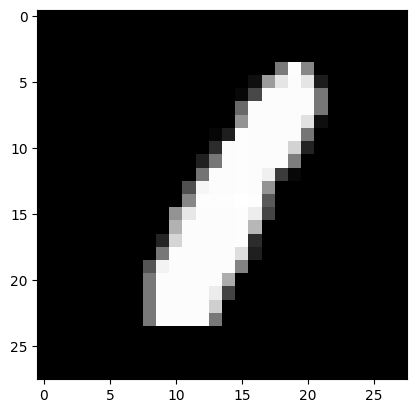

Prediction:  [7]
Label:  7


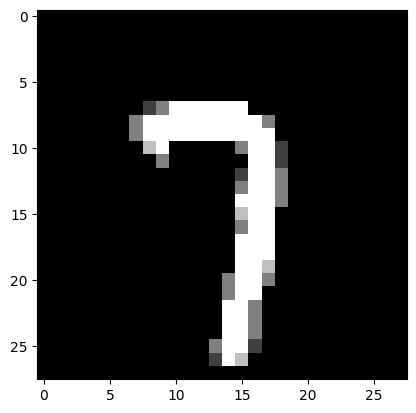

Prediction:  [9]
Label:  9


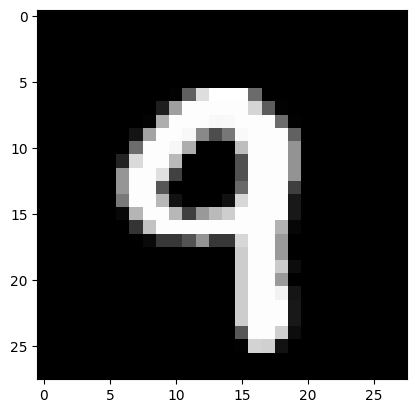

Prediction:  [3]
Label:  3


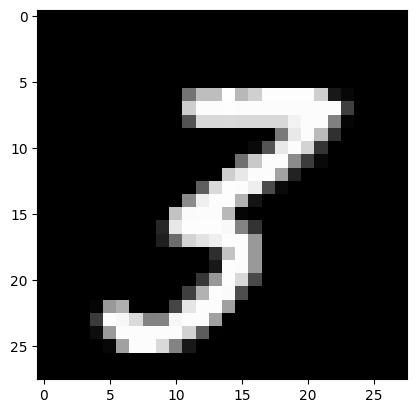

In [81]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [82]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 3 9 9 9 7 8 5 7 3 8 5 1 2 6 4 5 5 5 3 5 1 6 7 8 6 0 1 2 1 2 7 7 1 9 7 4
 8 5 6 9 4 7 2 5 7 4 7 4 5 5 3 1 8 9 2 5 1 9 5 2 9 0 9 8 3 0 6 7 1 5 6 3 5
 4 5 5 7 5 6 9 2 8 6 1 7 8 0 6 4 4 4 6 4 7 9 8 9 3 4 8 4 0 8 6 0 2 9 6 2 1
 4 1 2 3 3 4 0 9 0 7 0 7 8 9 5 6 9 8 7 9 3 9 1 7 2 1 6 1 3 8 2 5 4 1 4 5 5
 9 6 4 4 7 2 0 6 3 2 2 9 3 0 6 6 8 5 5 6 7 7 1 9 6 0 3 8 6 5 3 2 5 6 8 2 7
 4 2 4 9 4 4 9 4 5 1 8 9 1 9 8 6 1 8 4 1 5 6 2 7 0 4 2 4 5 9 1 9 8 9 1 5 4
 9 1 0 5 2 8 0 2 0 5 5 1 4 5 7 5 7 4 4 8 6 9 8 2 8 2 9 7 7 7 4 7 3 2 9 1 0
 1 2 7 8 8 9 1 7 6 9 1 1 7 7 9 7 9 7 8 2 5 3 5 6 7 0 8 4 7 3 7 0 6 6 0 9 6
 7 6 8 7 1 9 4 0 8 1 0 0 9 9 0 2 2 2 4 0 7 2 9 0 1 6 3 3 6 4 6 1 9 2 9 3 3
 0 0 9 7 0 6 2 1 8 8 7 0 6 6 8 9 5 1 9 9 4 7 9 6 6 4 1 2 9 0 8 6 1 8 2 6 0
 6 7 9 3 7 0 6 6 5 2 1 8 4 0 0 3 4 9 8 7 3 6 2 2 1 1 2 1 5 9 7 7 0 8 3 6 9
 2 5 7 5 1 1 5 1 6 2 3 9 1 1 5 7 1 1 6 7 6 8 6 9 2 5 0 8 4 8 2 4 2 4 3 3 9
 4 5 4 6 9 0 4 8 6 3 5 2 4 6 3 9 0 7 5 1 9 8 2 5 0 0 5 9 8 8 7 8 1 2 9 5 6
 3 7 6 5 7 0 9 3 2 3 8 7 

0.922